<a href="https://colab.research.google.com/github/codewithadvi/Deep-Learning-Projects/blob/main/Classifying_images_of_Clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


The tfds.load() function is used to load datasets from TensorFlow Datasets, a library of ready-to-use datasets for machine learning.

**as_supervised=True:** Returns the dataset as a tuple (input, label) instead of a dictionary.
Each item in the dataset will be:
Input (image): A 28x28 grayscale image of a clothing item.
Label: An integer between 0-9 representing the clothing category:0:T-shirt/top
**with_info=True:**
Returns additional information about the dataset, such as:Dataset description
**dataset['train']**
When you call tfds.load, TensorFlow Datasets already provides predefined splits (like train and test) for most datasets, including Fashion MNIST.
dataset['train'] accesses the training split of the dataset as defined by the dataset's metadata. Similarly, dataset['test'] accesses the testing split.


Load Dataset:
The code loads the Fashion MNIST dataset from TensorFlow Datasets.
Separate Training and Testing Data:Splits the data into train_dataset and test_dataset.Prepare for Preprocessing:After this, you'll typically preprocess the dataset (e.g., normalize pixel values).


In [ ]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images,labels

  train_dataset = train_dataset.map(normalize)
  test_dataset = test_dataset.map(normalize)
  train_dataset = train_dataset.cache()
  test_dataset  =  test_dataset.cache()

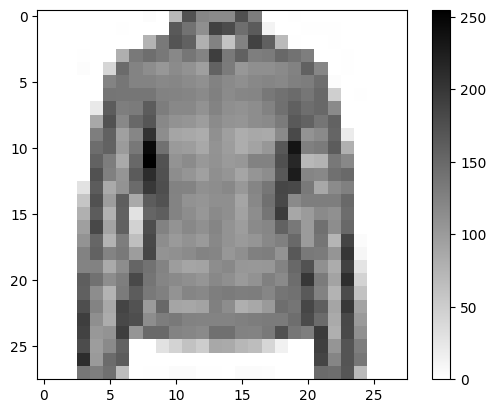

In [ ]:
for image, label in test_dataset.take(1):
 break
image = image.numpy().reshape((28,28))
#plot the figure
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()



Why cmap=plt.cm.binary?
The binary colormap maps data values to shades of black and white (a grayscale colormap) as fashion MNIT consists of band w


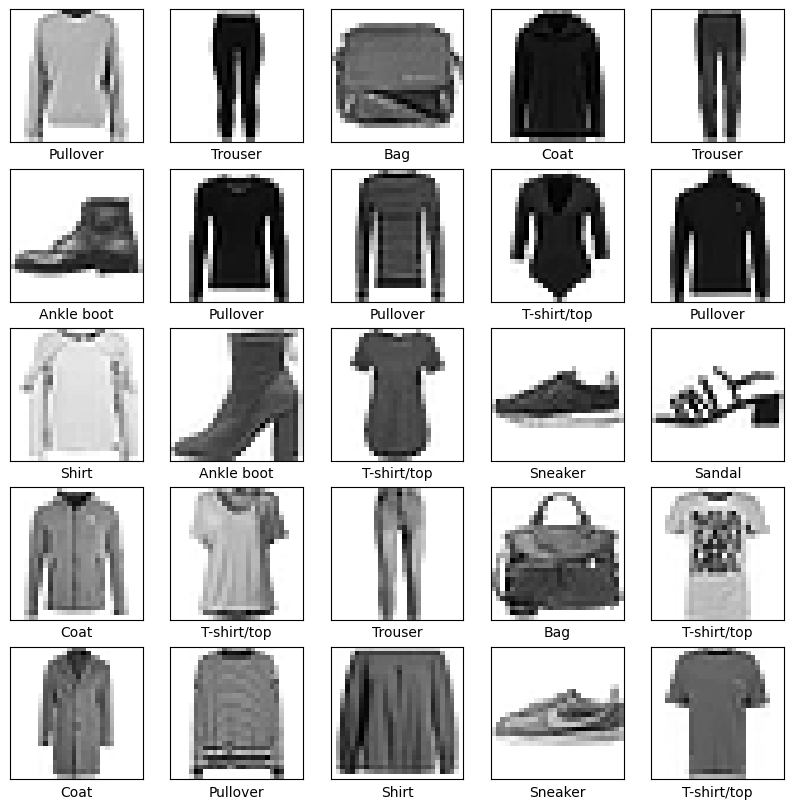

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation =tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


nput tf.keras.layers.Flatten — This layer transforms the images from a 2d-array of 28 × 28 pixels, to a 1d-array of 784 pixels (28*28). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn, as it only reformats the data.

"hidden" tf.keras.layers.Dense— A densely connected layer of 128 neurons. Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.

output tf.keras.layers.Dense — A 128-neuron, followed by 10-node softmax layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range [0, 1], representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6858 - loss: 10.1738
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7543 - loss: 0.7145
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7843 - loss: 0.6077
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8099 - loss: 0.5458
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8282 - loss: 0.5063


Repeat forever by specifying dataset.repeat() (the epochs parameter described below limits how long we perform training).
The dataset.shuffle(60000) randomizes the order so our model cannot learn anything from the order of the examples.
And dataset.batch(32) tells model.fit to use batches of 32 images and labels when updating the model variables.
Training is performed by calling the model.fit method:

Feed the training data to the model using train_dataset.
The model learns to associate images and labels.
The epochs=5 parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

math.ceil ensures that any leftover examples in the dataset are also processed (rounds up to the next whole number).


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8040 - loss: 0.5839
Accuracy on test dataset: 0.8001000285148621


test dataset accuracy wil be slightly less than train dataset


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


The test_dataset.take(1) statement extracts one batch of data from the test_dataset.
test_images: The input images for this batch.
test_labels: The corresponding true labels for these images.
This loop will only run once because of the .take(1) method.

test_images = test_images.numpy()
TensorFlow datasets often provide data as TensorFlow Tensor objects.
Converting them to Numpy arrays makes them easier to inspect, manipulate, or visualize using Python libraries like Matplotlib or NumPy.


In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([1.3074151e-05, 1.4844206e-06, 3.7022166e-02, 5.4343829e-05,
       9.2003459e-01, 1.1443663e-26, 4.2874031e-02, 9.7681021e-35,
       3.5913288e-07, 7.6157559e-23], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

The argmax function is used to identify the index of the maximum value along a specified axis in an array. In the context of machine learning, it is often used to determine the class with the highest predicted probability.

In [ ]:
test_labels[0]

4

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

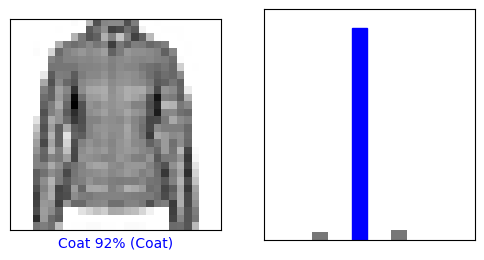

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

plot_image(): Displays the image and highlights whether the prediction was correct or not.
plot_value_array(): Shows the confidence of the model for all possible classes as a bar chart.

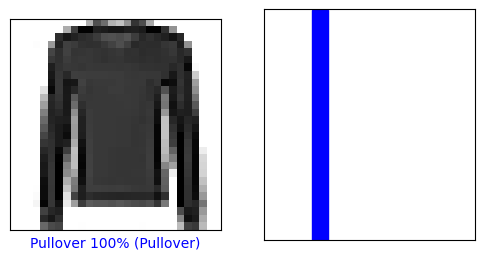

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

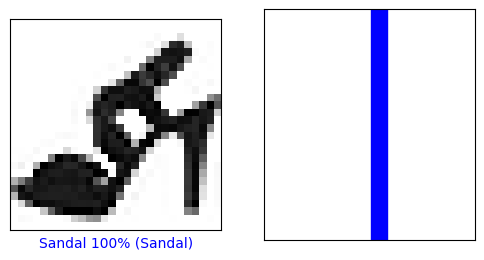

In [ ]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

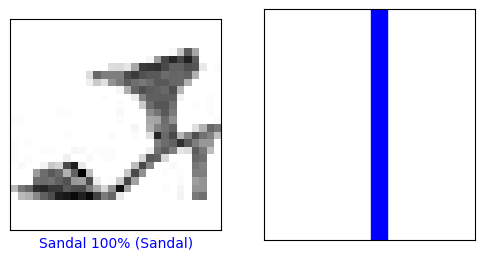

In [ ]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

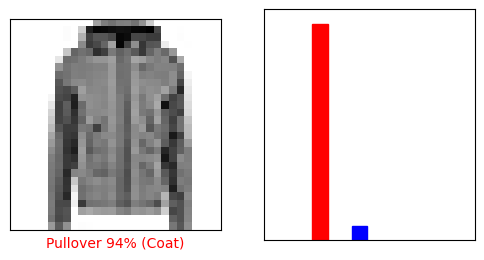

In [ ]:
i = 23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

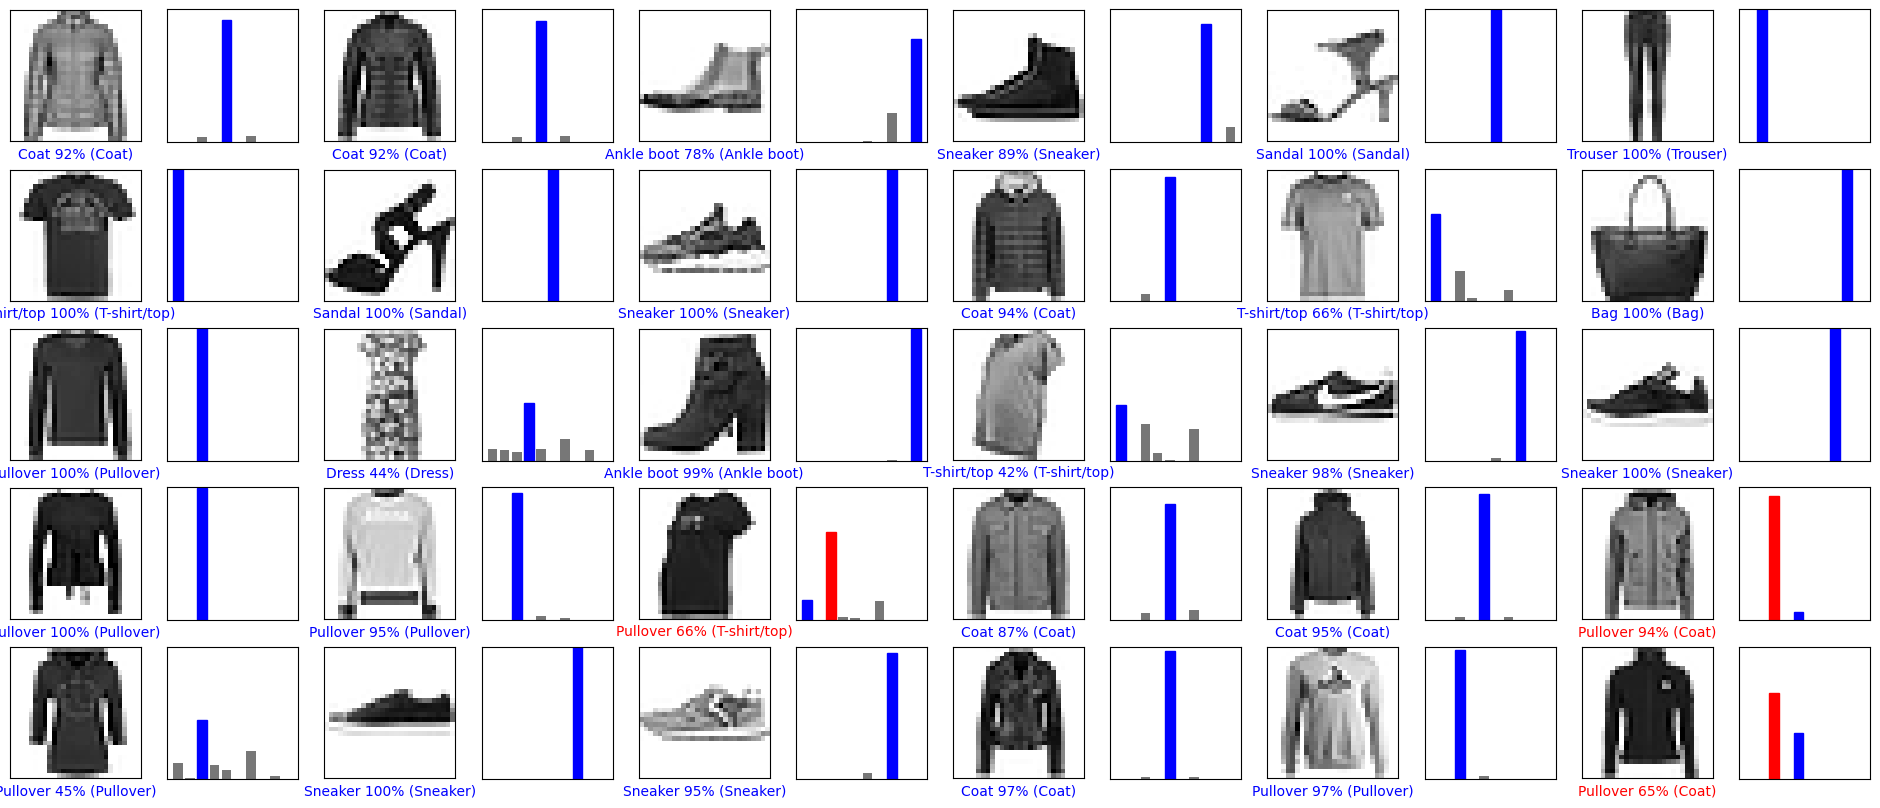

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [ ]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [ ]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[1.3074126e-05 1.4844179e-06 3.7022166e-02 5.4343625e-05 9.2003465e-01
  1.1443490e-26 4.2873953e-02 9.7679540e-35 3.5913152e-07 7.6156405e-23]]


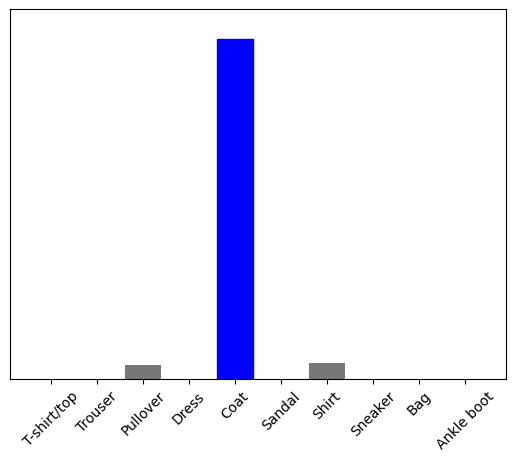

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

4